# Optimizing Group Fitness Class Utilization

### Import necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

### Load the datasets

In [43]:
# Problem A: Optimizing Group Fitness Class Utilization
fitness_data = pd.read_csv('problem1.csv')

### EDA

1. Overview of the dataset

In [44]:
print("Dataset overview:")
print(fitness_data.info())

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


2. Descriptive statistics

In [45]:
print("\nDescriptive statistics:")
fitness_data.describe()


Descriptive statistics:


,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


3. Distribution of target variable

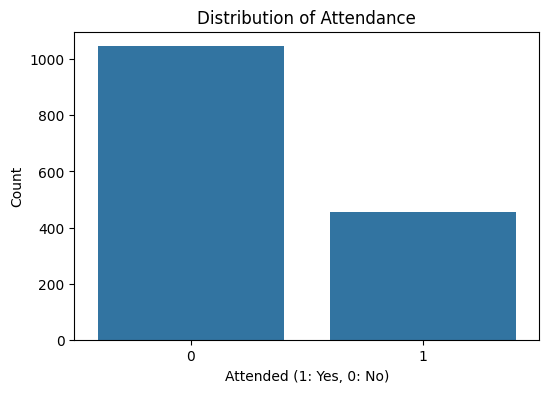

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='attended', data=fitness_data)
plt.title('Distribution of Attendance')
plt.xlabel('Attended (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [47]:
# Drop rows with any NaN values
fitness_data = fitness_data.dropna()

In [48]:
# Convert 'days_before' to numeric by removing non-numeric characters
fitness_data['days_before'] = fitness_data['days_before'].str.extract('(\d+)').astype(float)

In [49]:
# Convert categorical variables to numeric codes
fitness_data['day_of_week'] = fitness_data['day_of_week'].astype('category').cat.codes
fitness_data['time'] = fitness_data['time'].map({'AM': 0, 'PM': 1})
fitness_data['category'] = fitness_data['category'].astype('category').cat.codes


### Correlation Matrix

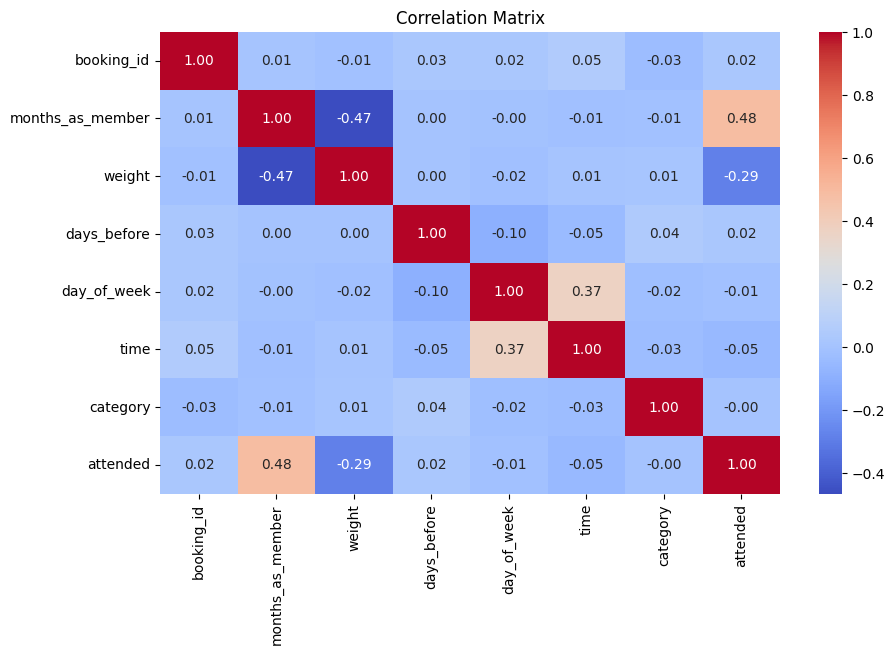

In [50]:
# Calculate the correlation matrix
corr_matrix = fitness_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Split the data

In [51]:
# Split data into features and target
X_fitness = fitness_data.drop(columns=['booking_id', 'attended'])
y_fitness = fitness_data['attended']

In [52]:
# Split the data into training and testing sets
X_train_fitness, X_test_fitness, y_train_fitness, y_test_fitness = train_test_split(X_fitness, y_fitness, test_size=0.3, random_state=42)

### Model Development

In [53]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

In [54]:
# Train the model
xgb_clf.fit(X_train_fitness, y_train_fitness)

# Make predictions on the test set
y_pred_fitness = xgb_clf.predict(X_test_fitness)

c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Evaluate the model

In [55]:
# Accuracy score
fitness_accuracy = accuracy_score(y_test_fitness, y_pred_fitness)
print(f"Fitness Class Attendance Prediction Accuracy: {fitness_accuracy:.2f}")

Fitness Class Attendance Prediction Accuracy: 0.73


In [56]:
# Classification report
class_report = classification_report(y_test_fitness, y_pred_fitness)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       308
           1       0.57      0.49      0.52       136

    accuracy                           0.73       444
   macro avg       0.68      0.66      0.67       444
weighted avg       0.72      0.73      0.72       444



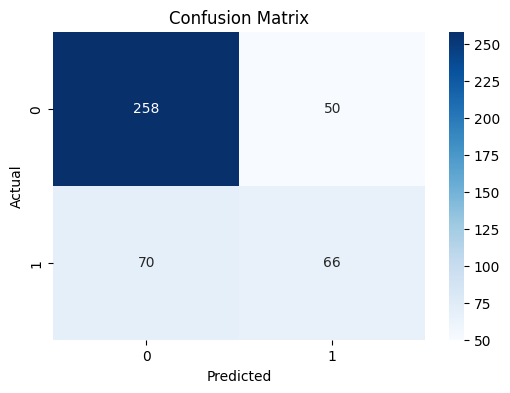

In [57]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_fitness, y_pred_fitness)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train_fitness, y_train_fitness)
y_pred_rf = rf_clf.predict(X_test_fitness)

rf_accuracy = accuracy_score(y_test_fitness, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.75


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_clf.fit(X_train_fitness, y_train_fitness)
y_pred_gb = gb_clf.predict(X_test_fitness)

gb_accuracy = accuracy_score(y_test_fitness, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Accuracy: 0.75


In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_fitness, y_train_fitness)
y_pred_log = log_reg.predict(X_test_fitness)

log_reg_accuracy = accuracy_score(y_test_fitness, y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")


Logistic Regression Accuracy: 0.77


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train_fitness, y_train_fitness)
y_pred_stack = stack_clf.predict(X_test_fitness)

stack_accuracy = accuracy_score(y_test_fitness, y_pred_stack)
print(f"Stacking Classifier Accuracy: {stack_accuracy:.2f}")


Stacking Classifier Accuracy: 0.76
